In [16]:
import torch
import cv2
import time
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
next(os.walk("C:/Users/Dareen/OneDrive/Desktop/graduation/distracted"))

('C:/Users/Dareen/OneDrive/Desktop/graduation/distracted',
 ['imgs'],
 ['driver_imgs_list.csv', 'sample_submission.csv'])

In [18]:
path="C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/driver_imgs_list.csv"
df=pd.read_csv(path)
df.head()

,subject,classname,img
0,p012,c0,img_10206.jpg
1,p012,c0,img_27079.jpg
2,p012,c0,img_50749.jpg
3,p012,c0,img_97089.jpg
4,p012,c0,img_37741.jpg


In [19]:
len(df.subject.value_counts().keys())

20

In [20]:
next(os.walk("C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs"))

('C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs',
 ['test', 'train'],
 [])

In [21]:
next(os.walk("C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train"))

('C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train',
 ['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
 [])

In [22]:
class_paths=[]
for dirname, _, filenames in os.walk("C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train"):
    for a in _:
        cls_path=os.path.join(dirname, a)
        print(cls_path)
        class_paths.append(cls_path)

C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c0
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c1
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c2
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c3
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c4
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c5
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c6
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c7
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c8
C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\c9


In [23]:
a,b,c=next(os.walk(class_paths[0]))
a,b,c[:10]

('C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train\\c0',
 [],
 ['img_100026.jpg',
  'img_10003.jpg',
  'img_100050.jpg',
  'img_100074.jpg',
  'img_100145.jpg',
  'img_100191.jpg',
  'img_100257.jpg',
  'img_100337.jpg',
  'img_100456.jpg',
  'img_10053.jpg'])

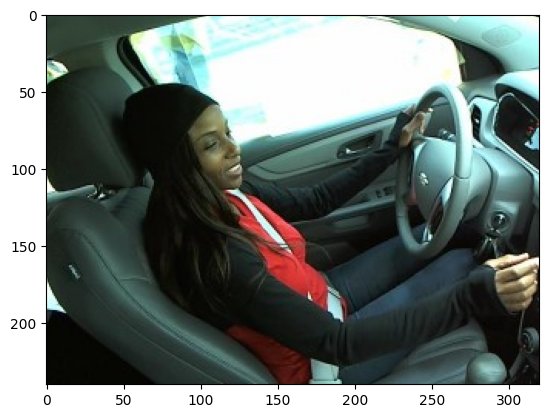

(240, 320, 3)

In [24]:
image1=cv2.cvtColor(cv2.imread('C:/Users/Dareen/OneDrive/Desktop/graduation/distracted/imgs/train/c5/img_68208.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.show()
image1.shape

In [25]:
train1=[]
labels=[]
for class_path in class_paths:
    a_,b_,c_=next(os.walk(class_path))
#     print(a_,b_,c_)
    for c__ in c_:
        img_path=os.path.join(a_, c__)
#         print(a_[-1:], img_path)
        img=cv2.imread(img_path, cv2.IMREAD_COLOR)
        img=cv2.resize(img, (96,96))
        train1.append(img)
        labels.append(int(a_[-1:]))
#         break

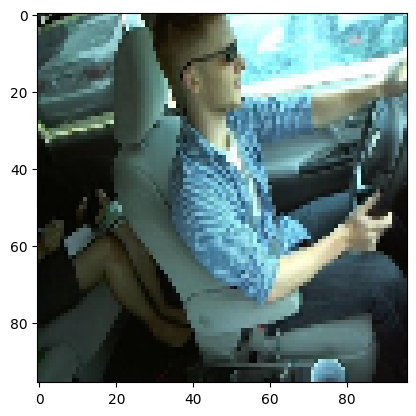

In [26]:
plt.imshow(cv2.cvtColor(train1[0], cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
print(np.array(labels).shape)
print(labels[:10])

(17462,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [28]:
y = tf.keras.utils.to_categorical(labels, 10)
print(type(y))
y[:10]

<class 'numpy.ndarray'>


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
train=np.array(train1, dtype=np.float32).reshape(-1, 96, 96, 3)
print(np.max(train))
train=train/255
print(np.max(train))

255.0
1.0


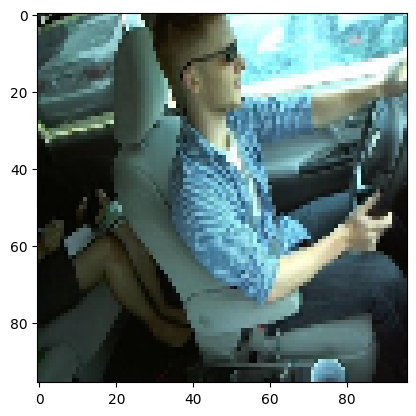

In [30]:
plt.imshow(cv2.cvtColor(train[0], cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
type(train)

numpy.ndarray

In [32]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [33]:
X_train, X_test, y_train, y_test=train_test_split(train, y, test_size=0.2, random_state=0, stratify=labels)
print("Train label distribution:", np.sum(y_train, axis=0))
print("Test label distribution:", np.sum(y_test, axis=0))

Train label distribution: [1562. 1403. 1426. 1447. 1454. 1443. 1449. 1226. 1214. 1345.]
Test label distribution: [391. 351. 357. 362. 363. 361. 362. 306. 304. 336.]


In [35]:
model=Sequential()
model.add(InputLayer(input_shape=(96,96,3)))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │     9,216,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

In [36]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
checkpointer=ModelCheckpoint(
    'saved_models/weights_best_vanilla.keras',
#     monitor='val_loss',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='auto',
)

In [38]:
es=EarlyStopping(monitor='val_loss',mode='auto',verbose=1,patience=2,restore_best_weights=True)

In [39]:
X_train.shape

(13969, 96, 96, 3)

In [40]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=40,
    epochs=10,
    verbose='auto',
    callbacks=[checkpointer, es],
    validation_split=0.1,
#     validation_data=None,
    shuffle=True
    )

Epoch 1/10


315/315 [==============================] - ETA: 0s - loss: 1.4703 - accuracy: 0.4671
Epoch 1: val_loss improved from inf to 0.43759, saving model to saved_models\weights_best_vanilla.keras
315/315 [==============================] - 296s 844ms/step - loss: 1.4703 - accuracy: 0.4671 - val_loss: 0.4376 - val_accuracy: 0.8669
Epoch 2/10
315/315 [==============================] - ETA: 0s - loss: 0.2733 - accuracy: 0.9190
Epoch 2: val_loss improved from 0.43759 to 0.16775, saving model to saved_models\weights_best_vanilla.keras
315/315 [==============================] - 241s 767ms/step - loss: 0.2733 - accuracy: 0.9190 - val_loss: 0.1677 - val_accuracy: 0.9506
Epoch 3/10
315/315 [==============================] - ETA: 0s - loss: 0.1364 - accuracy: 0.9614
Epoch 3: val_loss improved from 0.16775 to 0.05283, saving model to saved_models\weights_best_vanilla.keras
315/315 [==============================] - 237s 754ms/step - loss: 0.1364 - accuracy: 0.9614 - val_loss: 0.0528 - val_ac

In [41]:
model.evaluate(X_test, y_test)

110/110 [==============================] - 14s 130ms/step - loss: 0.0528 - accuracy: 0.9863


[0.05284751206636429, 0.9862582087516785]